In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.preprocessing import image


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive






Data Preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/SportsDataset")
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
sample_submission.csv  test.csv  train.csv    valid_split
test		       train	 train_split


In [ ]:
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/SportsDataset')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content/drive/My Drive/Colab Notebooks/SportsDataset
Current working directory: /content/drive/MyDrive/Colab Notebooks/SportsDataset


In [ ]:
Image_size=[224,224]
train_path='/content/drive/MyDrive/Colab Notebooks/SportsDataset/train'
#valid_path='/content/drive/MyDrive/Colab Notebooks/dataset/valid'
test_path='/content/drive/MyDrive/Colab Notebooks/SportsDataset/test'
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SportsDataset/train.csv')
print(df)

            image_ID      label
0     7c225f7b61.jpg  Badminton
1            b31.jpg  Badminton
2     acb146546c.jpg  Badminton
3     0e62f4d8f2.jpg  Badminton
4     cfd2c28c74.jpg    Cricket
...              ...        ...
8222  903d2fffb3.jpg    Cricket
8223  b5f174c688.jpg  Badminton
8224  2433770a67.jpg     Tennis
8225  6403964166.jpg     Tennis
8226  f07f00564e.jpg   Swimming

[8227 rows x 2 columns]


In [ ]:
#splitting data into train and valid set

train_set=df.sample(frac=0.8,random_state=25)
valid_set=df.drop(train_set.index)
# print(len(valid_set))

In [ ]:
labels=df.sort_values('label')
labels=list(labels.label.unique())
labels

['Badminton', 'Cricket', 'Karate', 'Soccer', 'Swimming', 'Tennis', 'Wrestling']

In [ ]:
root_dir='/content/drive/MyDrive/Colab Notebooks/SportsDataset/'
for i in labels:
 os.makedirs(root_dir+'/train_split/'+i)
 os.makedirs(root_dir+'/valid_split/'+i)

os.chdir("/content/drive/My Drive/Colab Notebooks/SportsDataset/")
!ls

sample_submission.csv  test.csv  train.csv    valid_split
test		       train	 train_split


In [ ]:
# Segregating data based on its labels in train and valid folders

root_dir='/content/drive/MyDrive/Colab Notebooks/SportsDataset/'
#print(train_set)
count=0
import shutil
#print(len(train_set))
for index,rows in train_set.iterrows():
  #print(rows['image_ID'])
  src=train_path+'/'+rows['image_ID']
  #prnt(src)
 
  dest=root_dir+'train_split'+'/'+rows['label']+'/'+rows['image_ID']
  if os.path.isfile(src)==True and os.path.isfile(dest)==False :
    count=count+1
    # shutil.copy(src,dest)
print(count)
# count1=0
# print(len(valid_set))
for index,rows in valid_set.iterrows():
  src=train_path+'/'+rows['image_ID']
  # print(src)
  # if os.path.isfile(src)==True:
  #   print(src)
  dest=root_dir+'valid_split'+'/'+rows['label']+'/'+rows['image_ID']
  if os.path.isfile(src)==True and os.path.isfile(dest)==False:
    count=count+1
    # shutil.copy(src,dest)
print(count)


0
5


Model Building

In [3]:
root_dir='/content/drive/MyDrive/Colab Notebooks/SportsDataset/'
width,height=224,224
batch_size=32

train_datagenerator=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    
)

train_generator=train_datagenerator.flow_from_directory(
    directory=root_dir+"train_split/",
    target_size=(width,height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_datagenerator=ImageDataGenerator(rescale=1./255)

valid_generator=valid_datagenerator.flow_from_directory(
    directory=root_dir+"valid_split/",
    target_size=(width,height),
    batch_size=batch_size,
    class_mode='categorical'
)


classes=train_generator.class_indices

print(classes)

Found 6582 images belonging to 7 classes.
Found 1645 images belonging to 7 classes.
{'Badminton': 0, 'Cricket': 1, 'Karate': 2, 'Soccer': 3, 'Swimming': 4, 'Tennis': 5, 'Wrestling': 6}


##RESNET50


In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50
#!pip install tensorflow_addons
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.metrics import Precision, Recall,Accuracy
from tensorflow.keras.callbacks import EarlyStopping


precision = Precision()
recall = Recall()

model=ResNet50(weights=None,classes=len(classes),input_shape=(224,224,3))
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',precision,recall])

history=model.fit(train_generator,epochs=30,validation_data=valid_generator,callbacks=[earlyStopping])

loss,accuracy,precision,recall=model.evaluate(valid_generator)
print(f'loss:{loss},accruracy:{accuracy},precision:{precision},recall:{recall}')


Epoch 1/30
206/206 [==============================] - 6490s 31s/step - loss: 1.6328 - accuracy: 0.4622 - precision_2: 0.6078 - recall_2: 0.2785 - val_loss: 2.3825 - val_accuracy: 0.2480 - val_precision_2: 0.2257 - val_recall_2: 0.1410
Epoch 2/30
206/206 [==============================] - 131s 637ms/step - loss: 1.2006 - accuracy: 0.5819 - precision_2: 0.7050 - recall_2: 0.4423 - val_loss: 1.7465 - val_accuracy: 0.4146 - val_precision_2: 0.4618 - val_recall_2: 0.3416
Epoch 3/30
206/206 [==============================] - 132s 640ms/step - loss: 1.0349 - accuracy: 0.6354 - precision_2: 0.7358 - recall_2: 0.5182 - val_loss: 2.4793 - val_accuracy: 0.3301 - val_precision_2: 0.3733 - val_recall_2: 0.2535
Epoch 4/30
206/206 [==============================] - 133s 642ms/step - loss: 0.9606 - accuracy: 0.6661 - precision_2: 0.7615 - recall_2: 0.5526 - val_loss: 4.7716 - val_accuracy: 0.3951 - val_precision_2: 0.4463 - val_recall_2: 0.3234
Epoch 5/30
206/206 [==============================] - 132

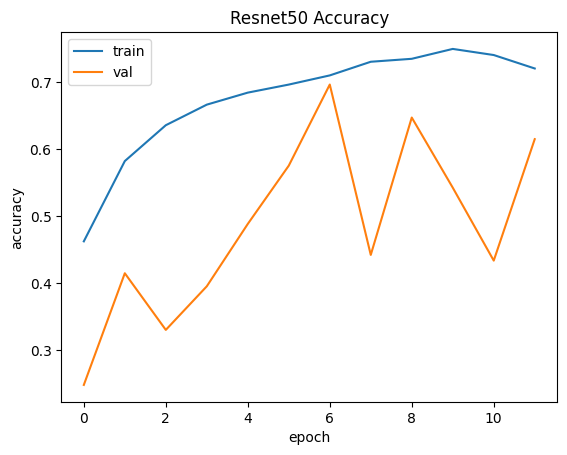

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Resnet50 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

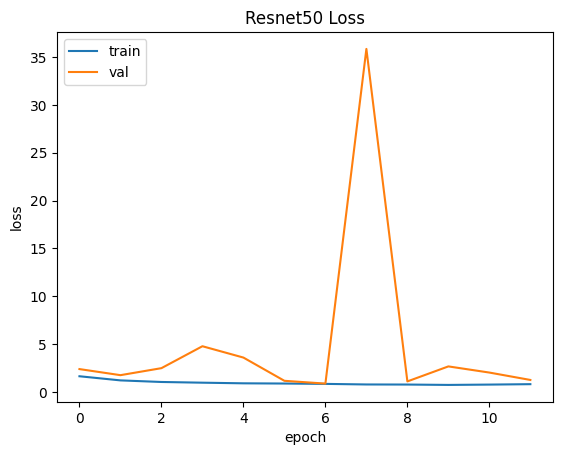

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Resnet50 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

VGG16 MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.metrics import Precision, Recall

#Pre_trained vgg16 with layer.trainable set to False
pretrained_vgg16=VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")
for layer in pretrained_vgg16.layers:
  layer.trainable=False

precision=Precision()
recall=Recall()
#defining new model and classfication layers

vgg16_model=Sequential()

vgg16_model.add(pretrained_vgg16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256,activation='relu'))
vgg16_model.add(Dense(len(classes),activation='softmax'))

#Compiling model
vgg16_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',precision,recall])
print(pretrained_vgg16.summary())
print(vgg16_model.summary())

VGG16





In [12]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')


history2=vgg16_model.fit(train_generator,epochs=30,validation_data=valid_generator,callbacks=[earlyStopping])


loss,accuracy,precision,recall=vgg16_model.evaluate(valid_generator)

print(f'loss:{loss},accruracy:{accuracy},precision:{precision},recall:{recall}')                                                                                                                                                                                                       

Epoch 1/30
206/206 [==============================] - 128s 620ms/step - loss: 0.3025 - accuracy: 0.8996 - precision_3: 0.9203 - recall_3: 0.8786 - val_loss: 0.5253 - val_accuracy: 0.8492 - val_precision_3: 0.8791 - val_recall_3: 0.8225
Epoch 2/30
206/206 [==============================] - 128s 620ms/step - loss: 0.2555 - accuracy: 0.9145 - precision_3: 0.9320 - recall_3: 0.8997 - val_loss: 0.4644 - val_accuracy: 0.8632 - val_precision_3: 0.8815 - val_recall_3: 0.8505
Epoch 3/30
206/206 [==============================] - 130s 632ms/step - loss: 0.2074 - accuracy: 0.9319 - precision_3: 0.9447 - recall_3: 0.9213 - val_loss: 0.5255 - val_accuracy: 0.8389 - val_precision_3: 0.8632 - val_recall_3: 0.8249
Epoch 4/30
206/206 [==============================] - 129s 627ms/step - loss: 0.1737 - accuracy: 0.9395 - precision_3: 0.9508 - recall_3: 0.9309 - val_loss: 0.4885 - val_accuracy: 0.8578 - val_precision_3: 0.8772 - val_recall_3: 0.8511
Epoch 5/30
206/206 [==============================] - 13

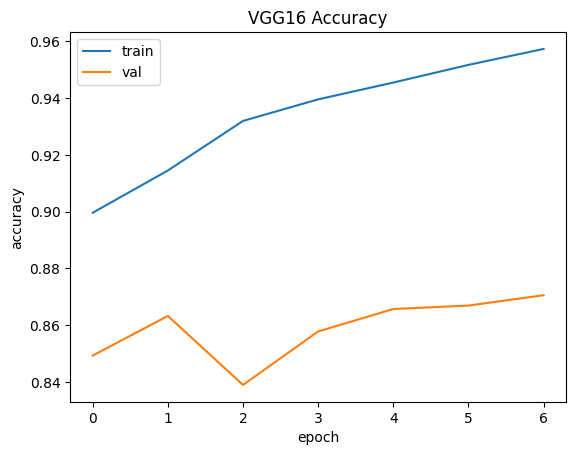

In [13]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('VGG16 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

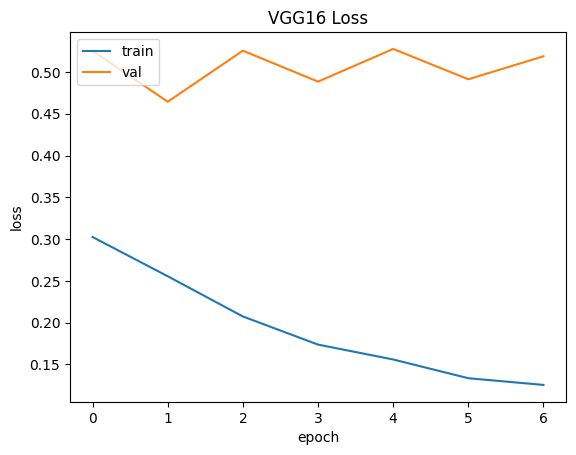

In [14]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('VGG16 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

VGG_19



In [15]:
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.metrics import Precision, Recall

# Loading the model
pretrained_vgg19 = VGG19( include_top = False,input_shape = (224,224,3),weights = 'imagenet')

precision=Precision()
recall=Recall()

for  layer in pretrained_vgg19.layers:
    layer.trainable = False

vgg19=Sequential()

vgg19.add(pretrained_vgg19)
vgg19.add(Flatten())
vgg19.add(Dense(256,activation='relu'))
vgg19.add(Dense(len(classes),activation='softmax'))

#Compiling model
vgg19.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',precision,recall])



80134624/80134624 [==============================] - 4s 0us/step


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', patience=3, verbose=2, mode='min')

history3=vgg19.fit(train_generator,epochs=30,validation_data=valid_generator,callbacks=[earlyStopping])

loss,accuracy,precision,recall=vgg19.evaluate(valid_generator)

print(f'loss:{loss},accruracy:{accuracy},precision:{precision},recall:{recall}')    

Epoch 1/30
206/206 [==============================] - 132s 634ms/step - loss: 1.5497 - accuracy: 0.5981 - precision_4: 0.7264 - recall_4: 0.4445 - val_loss: 0.8567 - val_accuracy: 0.6985 - val_precision_4: 0.7693 - val_recall_4: 0.6365
Epoch 2/30
206/206 [==============================] - 130s 631ms/step - loss: 0.6194 - accuracy: 0.7884 - precision_4: 0.8525 - recall_4: 0.7209 - val_loss: 0.6545 - val_accuracy: 0.7812 - val_precision_4: 0.8415 - val_recall_4: 0.7392
Epoch 3/30
206/206 [==============================] - 137s 665ms/step - loss: 0.4723 - accuracy: 0.8414 - precision_4: 0.8884 - recall_4: 0.7970 - val_loss: 0.5952 - val_accuracy: 0.8006 - val_precision_4: 0.8432 - val_recall_4: 0.7587
Epoch 4/30
206/206 [==============================] - 140s 680ms/step - loss: 0.3777 - accuracy: 0.8756 - precision_4: 0.9046 - recall_4: 0.8431 - val_loss: 0.6311 - val_accuracy: 0.7964 - val_precision_4: 0.8274 - val_recall_4: 0.7666
Epoch 5/30
206/206 [==============================] - 13

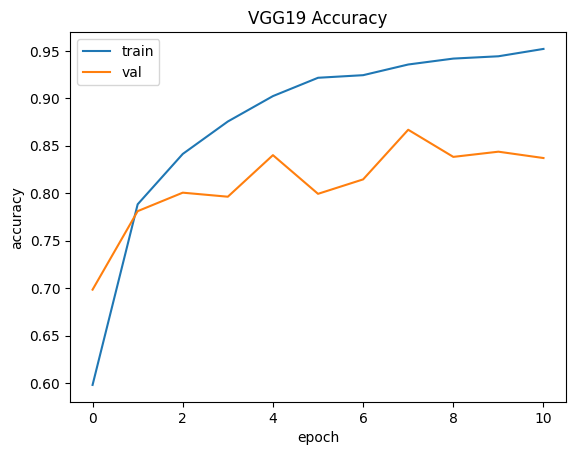

In [18]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('VGG19 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

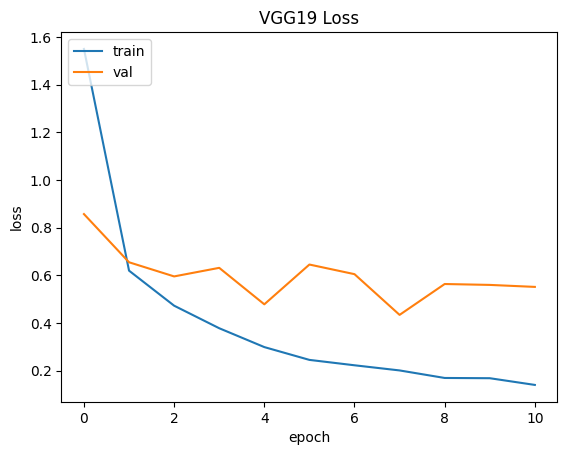

In [19]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('VGG19 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Comparison

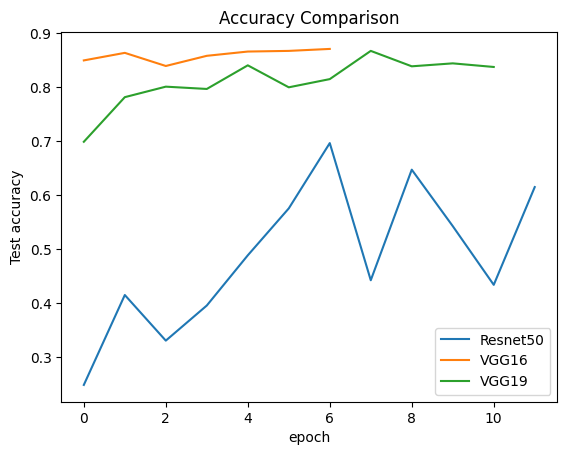

In [21]:
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy Comparison')
plt.ylabel('Test accuracy')
plt.xlabel('epoch')
plt.legend(['Resnet50', 'VGG16','VGG19'], loc='lower right')
plt.show()

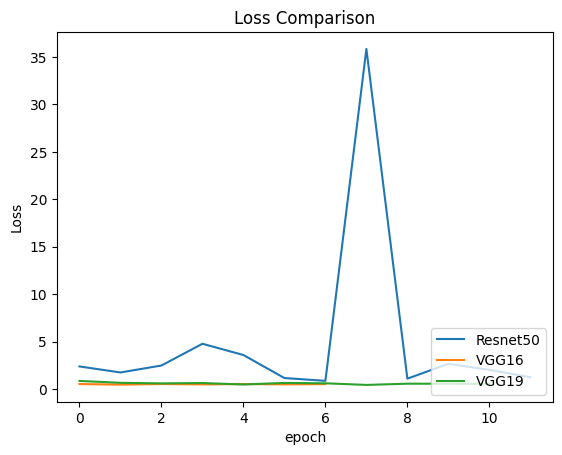

In [24]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Resnet50', 'VGG16','VGG19'], loc='lower right')
plt.show()